# Del 3: Pandas - Data Cleaning napredno

Pripravimo datasete:

In [1]:
!tar -xJf data/data_del_03.tar.xz -C ./data/

## Working With Strings In Pandas

Viri:
- [Working with text data](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)
- [Vectorized String Operations](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html)

Pandas has built in many vectorized string methods that can perform these tasks quicker and with less keystrokes.

### Data

<p>We'll work with the 2015 World Happiness Report again <em>and</em> additional economic data from the World Bank. You can find the data set <a target="_blank" href="https://www.kaggle.com/worldbank/world-development-indicators/version/2">here</a>. 
    
   

<p>Below are descriptions for the columns we'll be working with:</p>
<ul>
<li><code>ShortName</code> - Name of the country</li>
<li><code>Region</code> - The region the country belongs to</li>
<li><code>IncomeGroup</code> - The income group the country belongs to, based on Gross National Income (GNI) per capita</li>
<li><code>CurrencyUnit</code> - Name of country's currency</li>
<li><code>SourceOfMostRecentIncomeAndExpenditureData</code> - The name of the survey used to collect the income and expenditure data</li>
<li><code>SpecialNotes</code> - Contains any miscellaneous notes about the data</li>
</ul>

In [2]:
import pandas as pd
import numpy as np

In [3]:
# read the data sets into pandas
world_dev = pd.read_csv("data/World_dev.csv")
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [4]:
merged = pd.merge(left=happiness2015, 
                  right=world_dev,
                 how='left',
                 left_on='Country',
                 right_on='ShortName')

col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

merged.rename(col_renaming, axis=1, inplace=True)

In [5]:
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


### Using Apply to Transform Strings

In [ ]:
merged['CurrencyUnit'].head()

In [ ]:
words = 'Danish krone'
w = words.split()
print(w)
w[-1]

In [ ]:
def extract_last_word(element):
    return str(element).split()[-1]

In [ ]:
extract_last_word(words)

In [ ]:
merged['Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

In [ ]:
merged['Apply'].head(10)

### Vectorized String Methods

<img src="./images/Split.png">

In fact, pandas has built in a number of vectorized methods that perform the same operations for strings in series as Python string methods.


<p>Below are some common vectorized string methods, but you can find the full list <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/text.html#method-summary">here</a>:</p>

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

We access these vectorized string methods by adding a str between the Series name and method name:

<img src="./images/Syntax.png">

In [ ]:
merged['CurrencyUnit'].str[:5].head() #prvih pet elementov; lahko chain-amo

In [ ]:
merged['CurrencyUnit'].str.upper().str.split().head()

<div class="alert alert-block alert-info">
<b>Vaja: </b> Use the Series.str.split() method to split the CurrencyUnit column into a list of words and then use the Series.str.get() method to select just the last word. Assign the result to merged['Currency Vectorized'].
</div>

In [ ]:
merged['CurrencyUnit'].str.upper().str.split().str.get(-1).head()

#### Exploring Missing Values with Vectorized String Methods

In [ ]:
merged['CurrencyUnit'].isnull().sum() #13 manjkajočih vrednosti v tem stolpcu

In [ ]:
def compute_len(element):
    return len(str(element))

In [ ]:
lenghts_apply = merged['CurrencyUnit'].apply(compute_len)

In [ ]:
lenghts_apply.head() #za vsako besedo izpiše dolžino

In [ ]:
lenghts_apply.value_counts(dropna=False) #ne šteje manjkajočih vrednosti, dropna=> 

In [ ]:
merged['CurrencyUnit'].str.len().value_counts(dropna=False) #vrne dolžine in manjkajoče vrednosti

In [6]:
x=r'(.+)://([\w\.])/?(.*)'

## Regular Expressions in Pandas

### The Regular Expression Module


<p></p><center><img alt="basic matches" src="images/basic_match_1.svg"></center><p></p>


In [ ]:
import re

In [ ]:
re.search('and', 'hand')

In [ ]:
print(re.search('and', 'antdote'))

### Finding Specific Words in Strings

    April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the **base year** changed to 2002.
    Based on IMF data, national accounts data have been revised for 2005 onward; the new base year is 2005.

<img src="./images/set_syntax_breakdown.svg">

<img src="./images/basic_match_2.svg">

In [ ]:
pattern = "[Nn]ational accounts" #z veliko ali malo začetnico izluščimo besedo

In [ ]:
nat_account = merged['SpecialNotes'].str.contains(pattern)

In [ ]:
nat_account.sum()

In [ ]:
merged['SpecialNotes'].str.contains(pattern).sum()

In [ ]:
nat_account.value_counts(dropna=False)

In [ ]:
try:
    merged[nat_account]
except ValueError as e:
    print(e)                          #NaN moramo pretvoriti v True ali False

### Using Regular Expressions to Select Data

In [ ]:
try:
    merged[national_accounts]
except ValueError as e:
    print(e)

<img src="./images/Missing_values.svg">

In [ ]:
national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)

In [ ]:
national_accounts.value_counts(dropna=False)

In [ ]:
merged[national_accounts]

<p>The dataset we will be working with is based off <a target="_blank" href="https://www.kaggle.com/hacker-news/hacker-news-posts">this CSV of Hacker News stories from September 2015 to September 2016</a>. The columns in the dataset are explained below:</p>
    <ul>
<li><code>id</code>: The unique identifier from Hacker News for the story</li>
<li><code>title</code>: The title of the story</li>
<li><code>url</code>: The URL that the stories links to, if the story has a URL</li>
<li><code>num_points</code>: The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes</li>
<li><code>num_comments</code>: The number of comments that were made on the story</li>
<li><code>author</code>: The username of the person who submitted the story</li>
<li><code>created_at</code>: The date and time at which the story was submitted</li>
</ul>

In [7]:
hn = pd.read_csv('data/hacker_news.csv')

In [8]:
hn.head(2)

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20


In [9]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 7 columns):
id              20099 non-null int64
title           20099 non-null object
url             17659 non-null object
num_points      20099 non-null int64
num_comments    20099 non-null int64
author          20099 non-null object
created_at      20099 non-null object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


<div class="alert alert-block alert-info">
<b>Vaja: </b> Use Series.str.contains() and Series.sum() with the provided regex pattern to count how many Hacker News titles contain Python or python. Assign the result to python_mentions.
</div>

In [10]:
patt1 = "[Pp]ython"
patt2 = "[Rr]uby"

In [11]:
python_mentions = hn['title'].str.contains(patt1).sum()
python_mentions

160

<div class="alert alert-block alert-info">
<b>Vaja: </b> Use Series.str.contains() to create a series of the values from titles that contain Ruby or ruby. Assign the result to ruby_titles.
</div>

In [12]:
select = hn['title'].str.contains(patt2)
hn[select]  #izbor besed rub v dataset

,id,title,url,num_points,num_comments,author,created_at
190,11639807,Ruby on Google AppEngine Goes Beta,https://cloudplatform.googleblog.com/2016/05/R...,4,1,mark_l_watson,5/5/2016 21:31
484,11755791,Related: Pure Ruby Relational Algebra Engine,https://github.com/seansellek/related,102,29,flipandtwist,5/23/2016 18:27
1388,11406835,Show HN: HTTPalooza Ruby's greatest HTTP clie...,http://httpalooza.com,9,2,100k,4/1/2016 17:43
1949,10323292,Rewriting a Ruby C Extension in Rust: How a Na...,https://www.youtube.com/watch?v=2BdJeSC4FFI,5,2,brobinson,10/3/2015 9:57
2022,10287964,Show HN: CrashBreak Reproduce exceptions as f...,http://www.crashbreak.com/,37,9,mjaneczek,9/27/2015 21:17
2163,11177804,Ruby 2.3 Is Only 4% Faster than 2.2,http://ruby-performance-book.com/blog/2016/02/...,3,3,adymo,2/25/2016 21:08
2306,12420561,"Websocket Shootout: Clojure, C++, Elixir, Go, ...",https://hashrocket.com/blog/posts/websocket-sh...,83,37,blahedo,9/3/2016 19:04
2620,11578346,Why Startups Use Ruby on Rails?,http://mlsdev.com/en/blog/61-why-startups-use-...,1,1,MLSDev,4/27/2016 6:58
2645,11056341,Ask HN: Should I continue working a Ruby gem f...,NaN,2,2,nambante,2/8/2016 4:33
3290,12153065,Ruby on Rails and the importance of being stup...,https://blogs.harvard.edu/philg/2009/05/18/rub...,5,2,wtbob,7/24/2016 11:48


### Quantifiers

In [ ]:
#množilniki

In [ ]:
1000 - 2999

In [ ]:
'[1-2][0-9]{3}' #ponovi trikrat


<p></p><center><img alt="quantifier example" src="images/quantifier_example.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_numeric.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_other.svg"></center><p></p>


In [ ]:
#?: True, False

In [ ]:
'email, e-mail'

In [13]:
titles = hn['title']

In [14]:
email_bool = titles.str.contains('e-?mail')

In [15]:
email_bool.sum()

86

In [16]:
email_titles = titles[email_bool]

In [17]:
email_titles.head()

119     Show HN: Send an email from your shell to your...
313         Disposable emails for safe spam free shopping
1361    Ask HN: Doing cold emails? helps us prove this...
1750    Protect yourself from spam, bots and phishing ...
2421                   Ashley Madison hack treating email
Name: title, dtype: object

### Character Classes

    [video] Google Self-Driving SUV Sideswipes Bus
    New Directions in Cryptography by Diffie and Hellman (1976) [pdf]
    Wallace and Gromit  The Great Train Chase (1993) [video]

In [ ]:
regex = '[pdf]' #[] - poseben pomen definicija seta, damo \ escape character, interpretira kot dobesedni oglati oklepaj

<p></p><center><img alt="without escaping characters" src="images/without_escaped_character_syntax_breakdown.svg"></center><p></p>

In [ ]:
regex = '\[pdf\]'

<p></p><center><img alt="escaping characters" src="images/escaped_character_syntax_breakdown.svg"></center><p></p>


<p></p><center><img alt="character classes one" src="images/character_classes_v2_1.svg"></center><p></p>

<p></p><center><img alt="character classes two" src="images/character_classes_v2_2.svg"></center><p></p>


In [18]:
pattern = r'\[\w+\]'

In [19]:
tag_titles = titles[titles.str.contains(pattern)]

In [20]:
tag_titles.head(10)

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
210    A plan to rescue western democracy from the ig...
375                           Apple  Don't Blink [video]
398       [video] Google Self-Driving SUV Sideswipes Bus
445    New Directions in Cryptography by Diffie and H...
467    Wallace and Gromit  The Great Train Chase (199...
Name: title, dtype: object

In [21]:
print('sssd\nddsaa')

sssd
ddsaa


In [22]:
print('hello\b') #b - backslash

hello


In [23]:
print('hello\\b')

hello\b


In [24]:
print('hello\\\b')

hello\


### Raw strings

In [ ]:
print(r'hello\b') #interpretira kot čisti string, vedno r spredaj - raw string

### Extracting Substrings from a Series


<p></p><center><img alt="capture tag text" src="images/tags_syntax_breakdown_v2.svg"></center><p></p>


In [25]:
tag_5 = tag_titles.head()
print(tag_5)

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object


In [26]:
pattern = r'(\[\w+\])'

In [27]:
tag_5.str.extract(pattern)

,0
66,[pdf]
100,[German]
159,[pdf]
162,[pdf]
195,[Beta]


In [28]:
pattern = r'\[(\w+)\]'

In [29]:
tag_5.str.extract(pattern)

,0
66,pdf
100,German
159,pdf
162,pdf
195,Beta


In [30]:
tag_5_match = tag_5.str.extract(pattern, expand=False)

In [31]:
tag_5_match.value_counts()

pdf       3
Beta      1
German    1
Name: title, dtype: int64

<div class="alert alert-block alert-info">
<b>Vaja: </b> Use this technique to extract all of the tags from the Hacker News titles and build a frequency table of those tags.
</div>

In [32]:
tags = tag_titles
print(tags)

66       Analysis of 114 propaganda sources from ISIS, ...
100      Munich Gunman Got Weapon from the Darknet [Ger...
159           File indexing and searching for Plan 9 [pdf]
162      Attack on Kunduz Trauma Centre, Afghanistan  I...
195                 [Beta] Speedtest.net  HTML5 Speed Test
210      A plan to rescue western democracy from the ig...
375                             Apple  Don't Blink [video]
398         [video] Google Self-Driving SUV Sideswipes Bus
445      New Directions in Cryptography by Diffie and H...
467      Wallace and Gromit  The Great Train Chase (199...
471      Hacker Shows Us How to Unlock a Laptop Using a...
507         We have always been at war with Amazon [audio]
511      Office of Inspector General's Audit of the Off...
517                   Programming from the Ground Up [pdf]
541      Modular implicits  a system for ad-hoc polymor...
579      For Their Eyes Only: The Commercialization of ...
602      How the food lobby fights sugar regulation in .

In [33]:
patt = r'(\[\w+\])'

In [34]:
tags.str.extract(patt)

,0
66,[pdf]
100,[German]
159,[pdf]
162,[pdf]
195,[Beta]
210,[satire]
375,[video]
398,[video]
445,[pdf]
467,[video]


In [35]:
tags = tags.str.extract(patt, expand=False)
tags.value_counts().head(10)

[pdf]           276
[video]         111
[audio]           3
[2015]            3
[slides]          2
[beta]            2
[2014]            2
[HBR]             1
[transcript]      1
[Infograph]       1
Name: title, dtype: int64

In [36]:
titles.str.extract(pattern, expand=False).value_counts().head(10)

pdf          276
video        111
2015           3
audio          3
slides         2
beta           2
2014           2
Benchmark      1
blank          1
Petition       1
Name: title, dtype: int64

### Using Flags to Modify Regex Patterns

In [37]:
# s flagom povemo ignoriraj male in velike črke, napišemo samo email

In [38]:
email_tests = pd.Series(['email', 'Email', 'eMail', 'EMAIL'])

In [39]:
email_tests.str.contains(r'[Ee][Mm][Aa][Ii][Ll]')

0    True
1    True
2    True
3    True
dtype: bool

In [44]:
email_tests.str.contains(r'email', flags=re.I) #ignorecase, https://docs.python.org/3/library/re.html

NameError: name 're' is not defined

<div class="alert alert-block alert-info">
<b>Vaja: </b> Create a case insensitive regex pattern that matches all case variations of the letters SQL. Use that regex pattern and the ignorecase flag to count the number of mentions of SQL in titles.
</div>

In [41]:
hn['title'].str.contains(r'sql', flags=re.I).value_counts()

NameError: name 're' is not defined

In [42]:
hn['title'].str.contains(r'sql', flags=re.I).sum()

NameError: name 're' is not defined

### Primer: Create a frequency table of the different capitalizations of SQL

In [45]:
pattern = r'\w+sql'

In [46]:
hn_sql = hn[hn['title'].str.contains(pattern, flags=re.I)].copy()

NameError: name 're' is not defined

In [47]:
hn_sql.head()

NameError: name 'hn_sql' is not defined

In [48]:
hn_sql['flavor'] = hn_sql['title'].str.extract(r'(\w+sql)', flags=re.I, expand=False)

NameError: name 'hn_sql' is not defined

In [49]:
hn_sql['flavor'].value_counts()

NameError: name 'hn_sql' is not defined

In [50]:
hn_sql['flavor'] = hn_sql['flavor'].str.lower()

NameError: name 'hn_sql' is not defined

In [51]:
sql_pivot = hn_sql.pivot_table(index='flavor',
                              values='num_comments',
                              aggfunc='mean')

NameError: name 'hn_sql' is not defined

In [52]:
sql_pivot

NameError: name 'sql_pivot' is not defined

### Primer: Versions of Python

<p></p><center><img alt="Python versions regex pattern" src="images/python_versions.svg"></center><p></p>

In [53]:
pattern = '[Pp]ython ([\d\.]+)'

In [54]:
titles.str.extract(pattern, expand=False).value_counts()

3        10
2         3
3.5       3
3.6       2
1.5       1
4         1
8         1
2.7       1
3.5.0     1
Name: title, dtype: int64

In [ ]:
hn['url'].head()

### Primer: Extracting URL Parts


<p></p><center><img alt="URL examples showing protocol, domain, and page path" src="images/url_examples_2.svg"></center><p></p>


In [ ]:
url_parts = hn['url']

In [ ]:
url_parts.head()

In [ ]:
pattern = r'(.+)://([\w\.]+)/?(.*)'

In [ ]:
test_url_extracted = url_parts.str.extract(pattern)

In [ ]:
test_url_extracted.head()

#### Using Named Capture Groups

In [ ]:
pattern = r"(?P<protocol>.+)://(?P<domain>[\w\.]+)/?(?P<path>.*)"

In [ ]:
pattern = r"(?P<protocol>.+)://(?P<domain>[\w\.]+)/?(?P<path>.*)"

In [ ]:
test_url_extracted = url_parts.str.extract(pattern)

In [ ]:
test_url_extracted.head()

In [ ]:
test_url_extracted['domain'].value_counts().head() #https://www.cheatography.com/davechild/cheat-sheets/regular-expressions/

## Working With Missing Data

- [Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#working-with-missing-data)

### Introduction

#### Why does missing data exist?

#### Workflow for treating missing values

1. Convert all missing values to null values.
2. Analyze the amount and type of missingness in the data.
3. Appropriately delete or impute missing values.
4. Evaluate & compare the performance of the treated/imputed dataset.

### Data

In [55]:
import pandas as pd
import numpy as np

#### 2015, 2016, and 2017 World Happiness Reports

In [56]:
happiness2015 = pd.read_csv('data/wh_2015.csv') 
happiness2016 = pd.read_csv('data/wh_2016.csv') 
happiness2017 = pd.read_csv('data/wh_2017.csv')

In [57]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [58]:
print('2015: ', shape_2015)
print('2016: ', shape_2016)
print('2017: ', shape_2017)

2015:  (164, 13)
2016:  (164, 14)
2017:  (164, 13)


In [59]:
happiness2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.5870000000000015,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678000000000004,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.6287699999999999,0.14145,0.4363,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,0.033280000000000004,1.32548,1.36058,0.87464,0.6493800000000001,0.48357,0.34139,2.4920400000000003,2015


#### Diabetes dataset

In [60]:
diabetes = pd.read_csv('data/pima-indians-diabetes_data.csv')

In [61]:
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


#### Airquality dataset

In [62]:
airquality = pd.read_csv('data/air-quality.csv', parse_dates=['Date'], index_col='Date')

In [63]:
airquality.head()

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56


### Detecting & Identifying Missing Data

In [64]:
happiness2016.isnull().sum() #seštevek manjkajočih vrednosti

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [65]:
missing = happiness2016['Happiness Score'].isnull()

In [66]:
happiness2016[missing]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
157,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
158,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
159,Lesotho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
160,Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
161,Oman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
162,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
163,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016


In [67]:
happiness2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [ ]:
happiness2015.head()

In [68]:
h_2015 = happiness2015['Region'].unique()
# Print the sorted values
np.sort(h_2015)#vse vrednosti v stolpcu

array(['.', 'Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America',
       'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

In [69]:
happiness2015[happiness2015['Region'] == '.'] #manjkajoče vrednosti, ki niso klasične, označene s piko in vprašaji

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,.,?,.,.,.,.,.,.,.,.,.,2015
159,Namibia,.,?,.,.,.,.,.,.,.,.,.,2015
160,Puerto Rico,.,?,.,.,.,.,.,.,.,.,.,2015
161,Somalia,.,?,.,.,.,.,.,.,.,.,.,2015
162,Somaliland Region,.,?,.,.,.,.,.,.,.,.,.,2015
163,South Sudan,.,?,.,.,.,.,.,.,.,.,.,2015


In [70]:
# Preberemo še enkrat, da se rešimo manjkajočih vrednosti
happiness2015 = pd.read_csv('data/wh_2015.csv', na_values='.')

In [71]:
happiness2015[happiness2015['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [72]:
happiness2015.replace('?', np.nan, inplace=True)

In [73]:
happiness2015[happiness2015['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


<div class="alert alert-block alert-info">
<b>Vaja: </b> Use the DataFrame.isnull() and DataFrame.sum() methods to confirm the number of missing values in happiness2017. 
</div>

In [74]:
happiness2017.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

#### Replacing hidden missing values

In [75]:
diabetes.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                    0
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [76]:
diabetes.describe() #v stolpcu BMI želimo 0 dti na NaN, ker ne more biti vrednost 0

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [77]:
zero_bmi = diabetes.loc[diabetes['BMI']==0, 'BMI']

In [78]:
zero_bmi

9      0.0
49     0.0
60     0.0
81     0.0
145    0.0
371    0.0
426    0.0
494    0.0
522    0.0
684    0.0
706    0.0
Name: BMI, dtype: float64

In [79]:
diabetes.loc[diabetes['BMI']==0, 'BMI'] = np.nan

In [80]:
diabetes.loc[diabetes['BMI'].isnull(), 'BMI']

9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64

In [ ]:
# % manjkajočih vrednosti:

#### Analyzing missingness percentage

In [ ]:
missing_values_sum = diabetes.isnull().sum()
print('Total Missing Values:\n', missing_values_sum)

In [ ]:
missing_values_percent = missing_values_sum / diabetes.shape[0]

print('Percentage of Missing Values:\n', missing_values_percent)

### Visualizing Missing Data

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

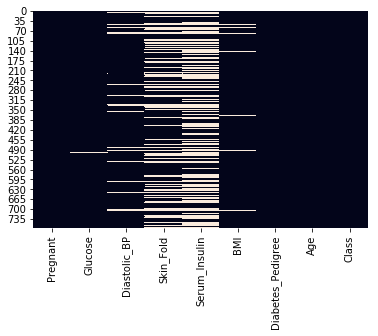

In [82]:
sns.heatmap(diabetes.isnull(), cbar=False)
plt.show() #grafični prikaz manjkajočih vrednosti

[missingno GitHub](https://github.com/ResidentMario/missingno)

> Namestimo missingno: `conda install -c conda-forge missingno `

In [83]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
msno.__version__

'0.4.2'

### Missingness Patterns

In [85]:


# Visualize the missingness summary of sorted
msno.matrix(sorted_values)

# Display nullity matrix
plt.show()

NameError: name 'sorted_values' is not defined

### Handle Missing Values

#### Dropping Rows

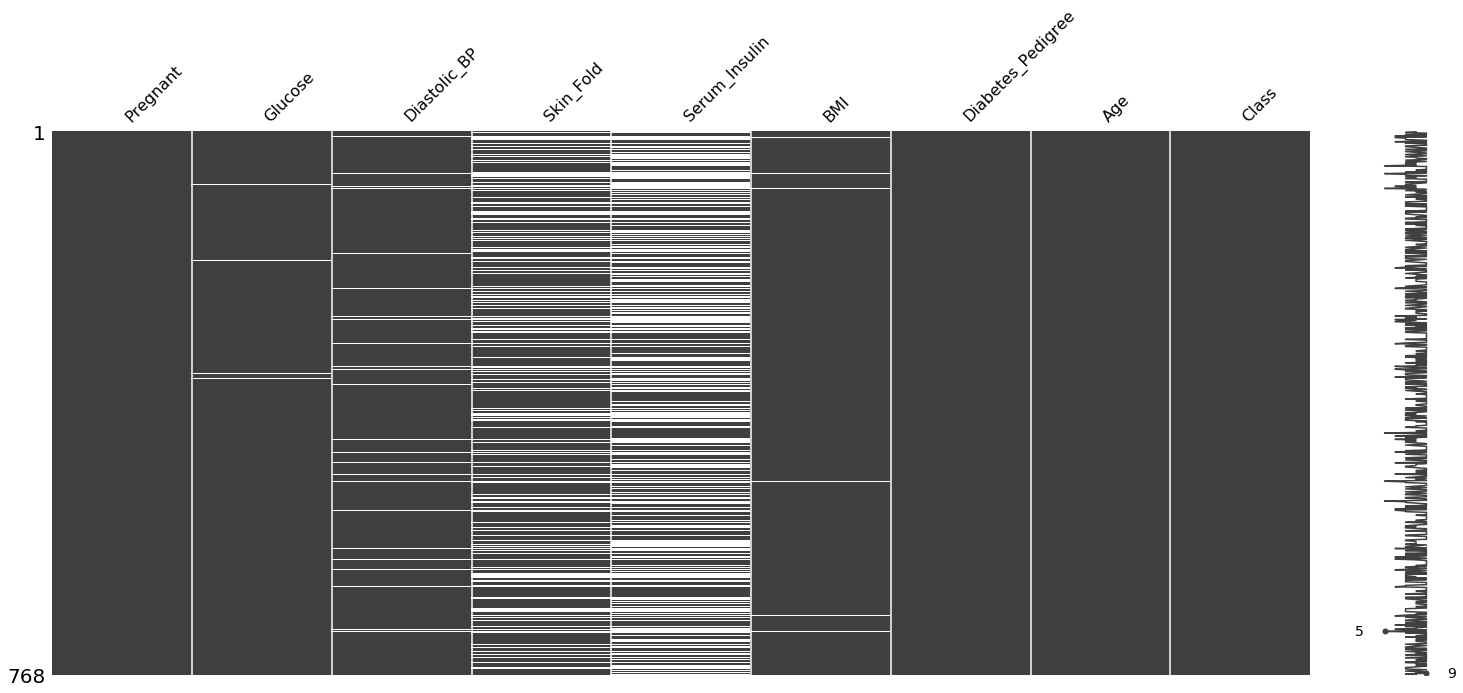

In [86]:
# Visualize the missingness of diabetes after-dropping missing values
msno.matrix(diabetes)
plt.show()

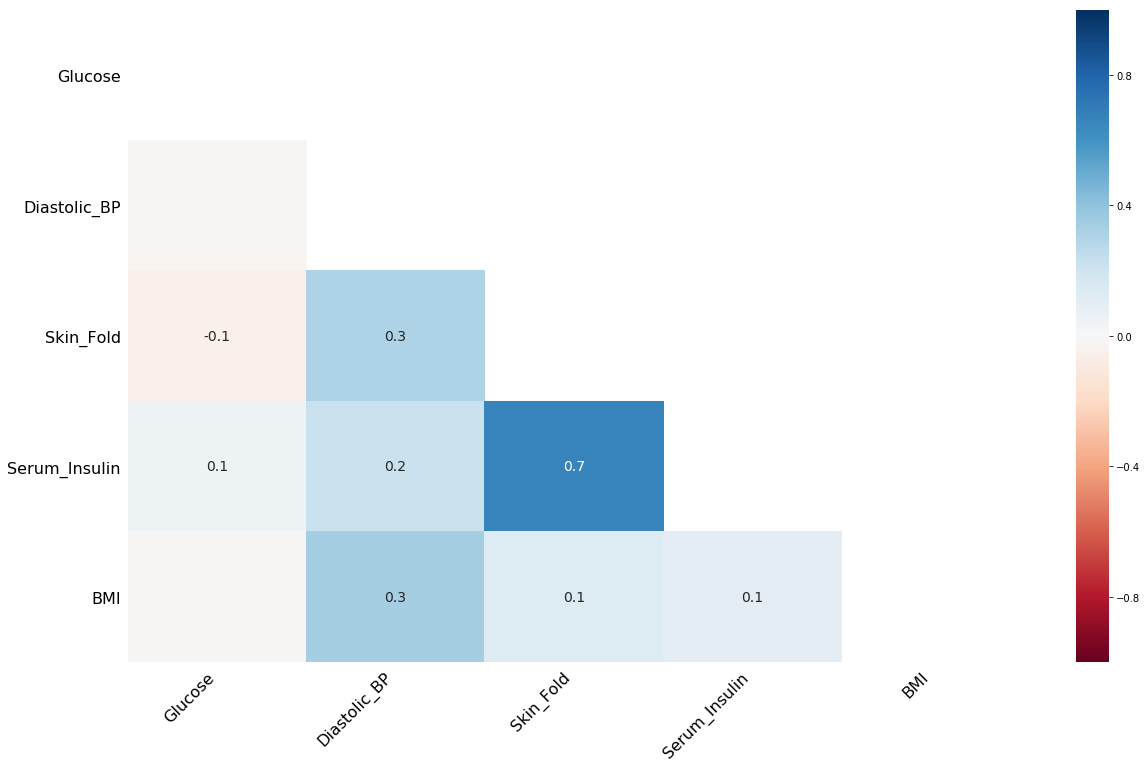

In [87]:
# Visualize the correlation of missingness between variables
msno.heatmap(diabetes)

# Show heatmap
plt.show()

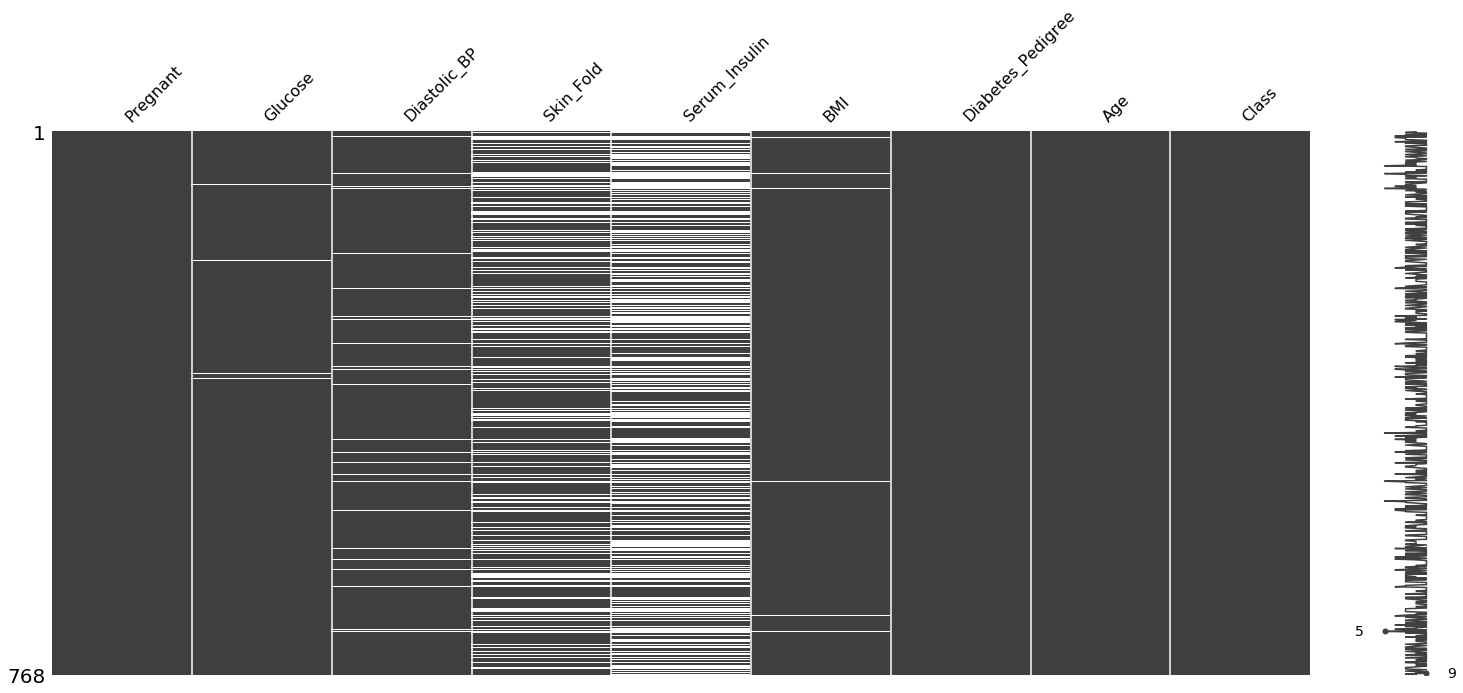

In [88]:
# Visualize the missingness in the data
msno.matrix(diabetes)
plt.show()

#### Imputation Techniques

##### Mean & median imputation


In [89]:
from sklearn.impute import SimpleImputer

In [90]:
diabetes_mean = diabetes.copy(deep=True)

In [91]:
mean_imputer = SimpleImputer(strategy='mean')

In [92]:
diabetes_mean.iloc[:,:] = mean_imputer.fit_transform(diabetes_mean)

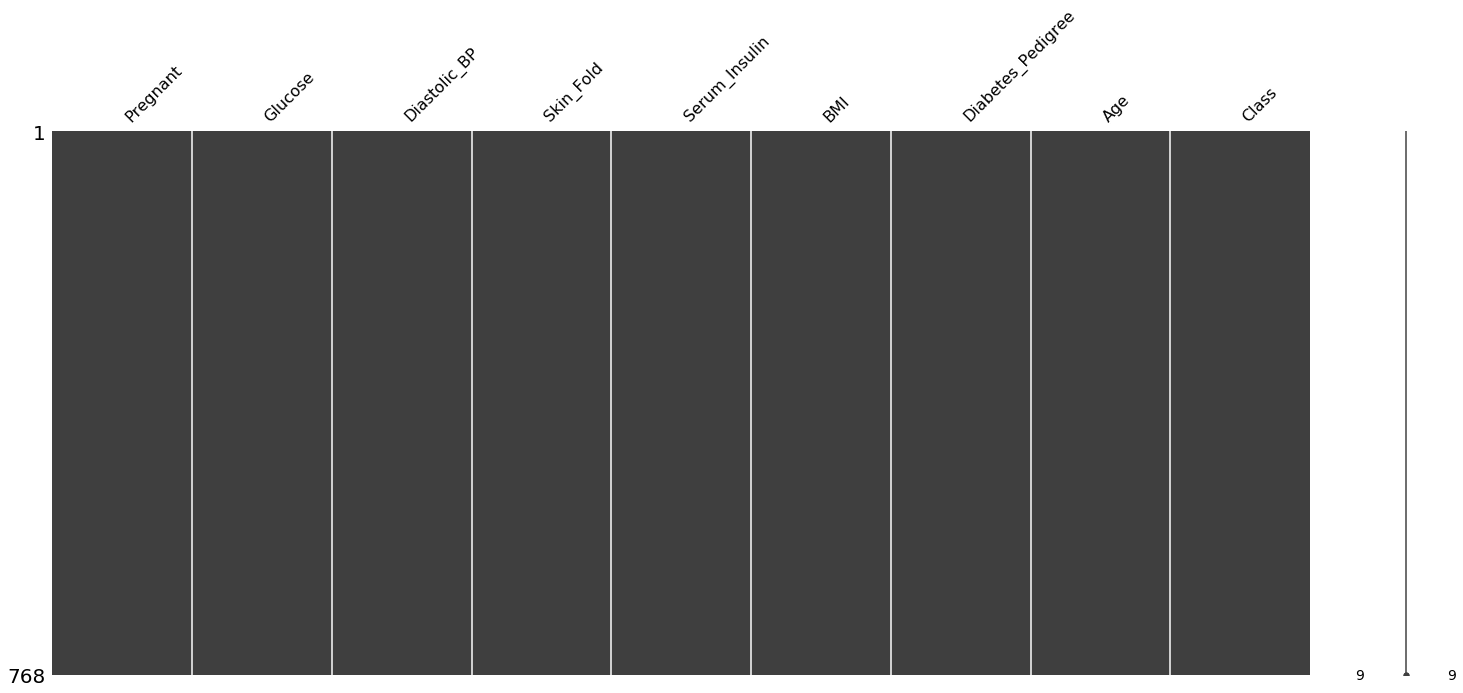

In [93]:
# Visualize the missingness in the data
msno.matrix(diabetes_mean)
plt.show()

In [94]:
# Make a copy of diabetes
diabetes_median = diabetes.copy(deep=True)

# Create median imputer object
median_imputer = SimpleImputer(strategy='median')

# Impute median values in the DataFrame diabetes_median
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)

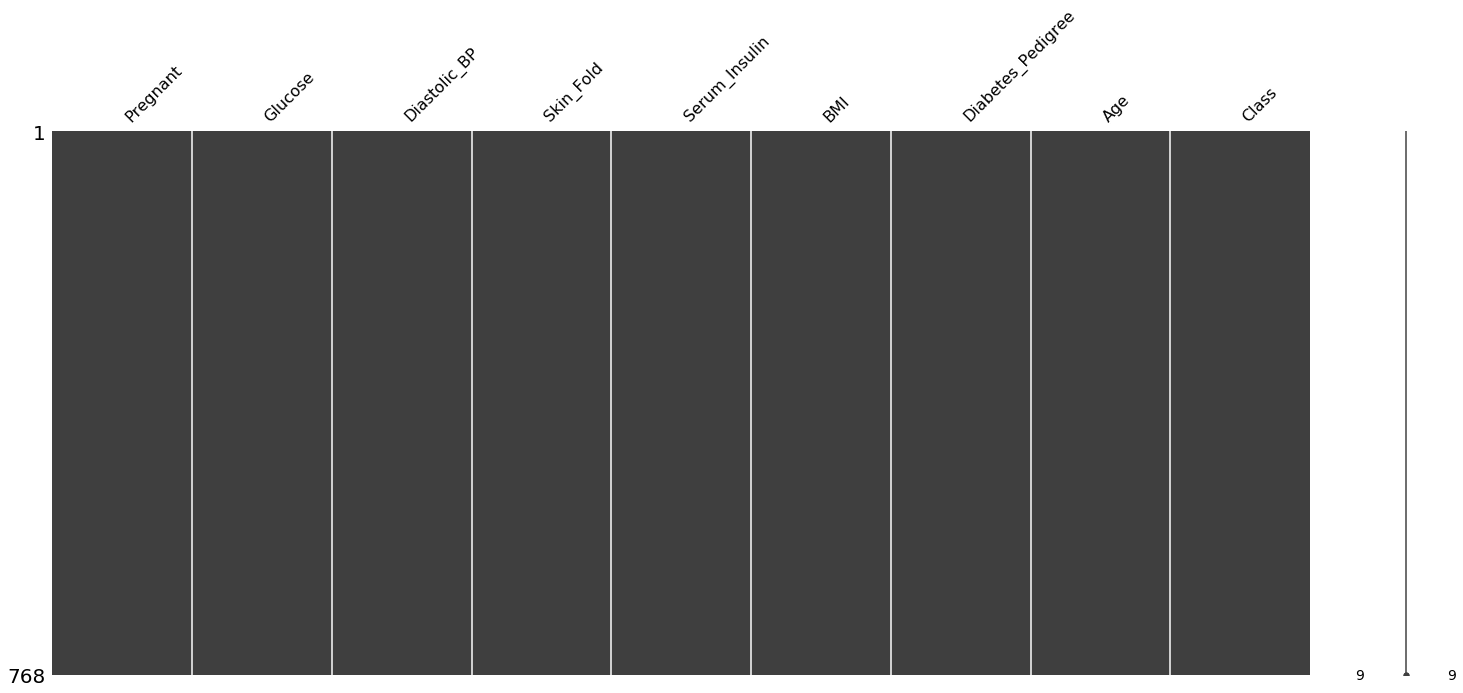

In [95]:
# Visualize the missingness in the data
msno.matrix(diabetes_median)
plt.show()

##### Mode and constant imputation

In [96]:
# Make a copy of diabetes
diabetes_mode = diabetes.copy(deep=True)

# Create mode imputer object
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute using most frequent value in the DataFrame mode_imputer
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)

In [97]:
# Make a copy of diabetes
diabetes_constant = diabetes.copy(deep=True)

# Create median imputer object
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Impute missing values to 0 in diabetes_constant
diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)

##### Visualize imputations

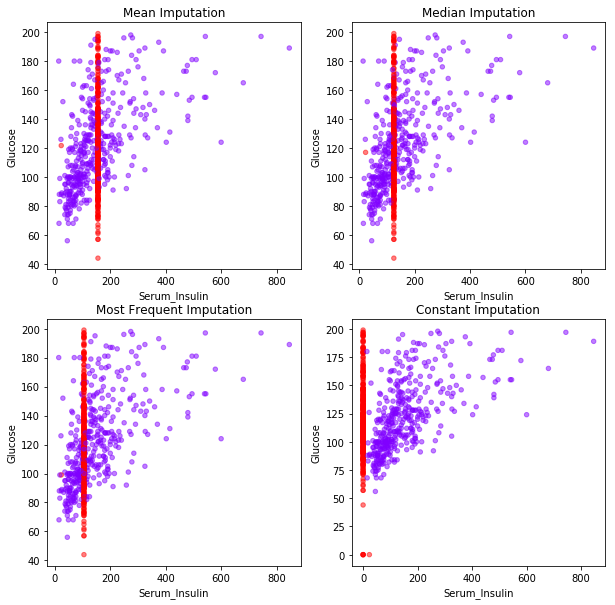

In [98]:
# Set nrows and ncols to 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = diabetes.Serum_Insulin.isnull() | diabetes.Glucose.isnull()

# Create a dictionary of imputations
imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

# Loop over flattened axes and imputations
for ax, df_key in zip(axes.flatten(), imputations):
    # Select and also set the title for a DataFrame
    imputations[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter', 
                          alpha=0.5, c=nullity, cmap='rainbow', ax=ax, 
                          colorbar=False, title=df_key)
plt.show()

#### Dropping Columns

Predpriprava skupnega dataseta:

In [99]:
# In the next exercise, we'll update the column names to make them uniform and combine the dataframes again.

happiness2017.columns = happiness2017.columns.str.replace('.', ' ') \
                    .str.replace('\s+', ' ') \
                    .str.strip() \
                    .str.upper()

happiness2016.columns = happiness2016.columns.str.replace('.', ' ') \
                    .str.replace(r'[\(\)]', '') \
                    .str.strip() \
                    .str.upper()

happiness2015.columns = happiness2015.columns.str.replace('.', ' ') \
                    .str.replace(r'[\(\)]', '') \
                    .str.strip() \
                    .str.upper()

In [100]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

In [101]:
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

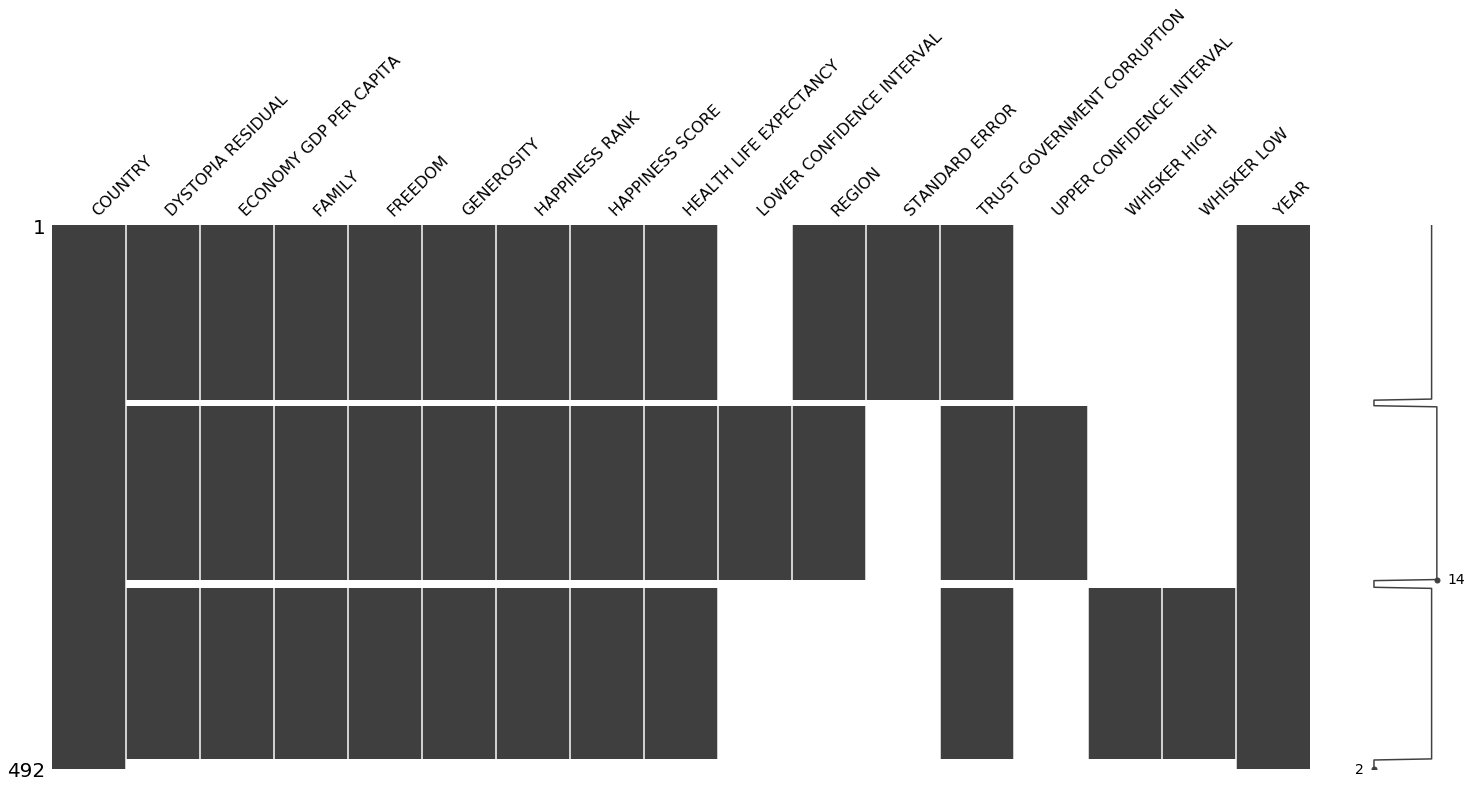

In [102]:
msno.matrix(combined)
plt.show()

In [103]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 
                   'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 
                   'WHISKER LOW']

In [104]:
combine_drop = combined.drop(columns_to_drop, axis=1)

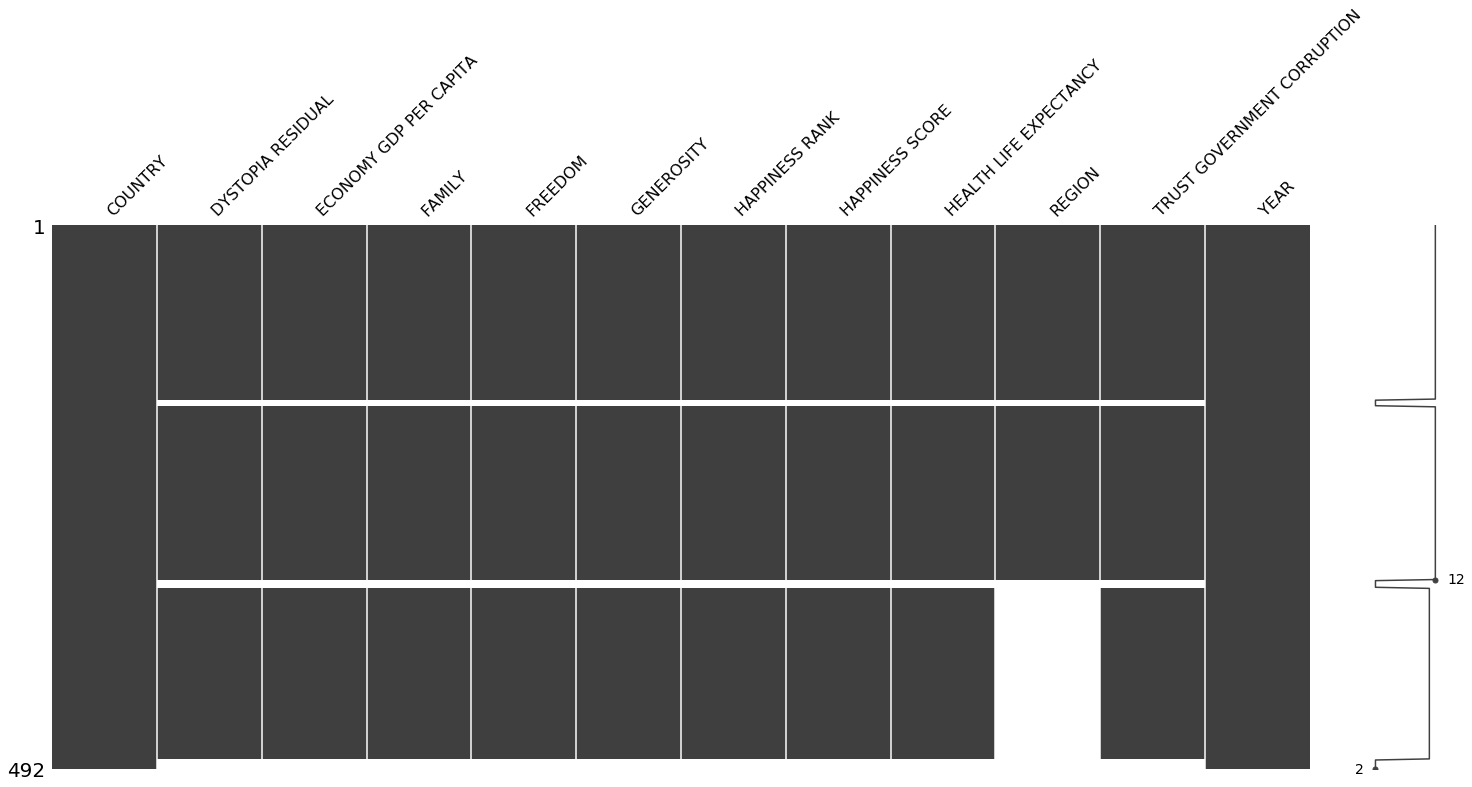

In [105]:
msno.matrix(combine_drop)
plt.show()

In [106]:
# rešitev, če je izločitvenih stolpcev več

In [107]:
combined.notnull().sum().sort_values()

WHISKER LOW                    155
WHISKER HIGH                   155
LOWER CONFIDENCE INTERVAL      157
UPPER CONFIDENCE INTERVAL      157
STANDARD ERROR                 158
REGION                         315
HEALTH LIFE EXPECTANCY         470
DYSTOPIA RESIDUAL              470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
FREEDOM                        470
GENEROSITY                     470
HAPPINESS RANK                 470
HAPPINESS SCORE                470
TRUST GOVERNMENT CORRUPTION    470
COUNTRY                        492
YEAR                           492
dtype: int64

In [108]:
combined_droped = combined.dropna(thresh=159, axis=1).copy()

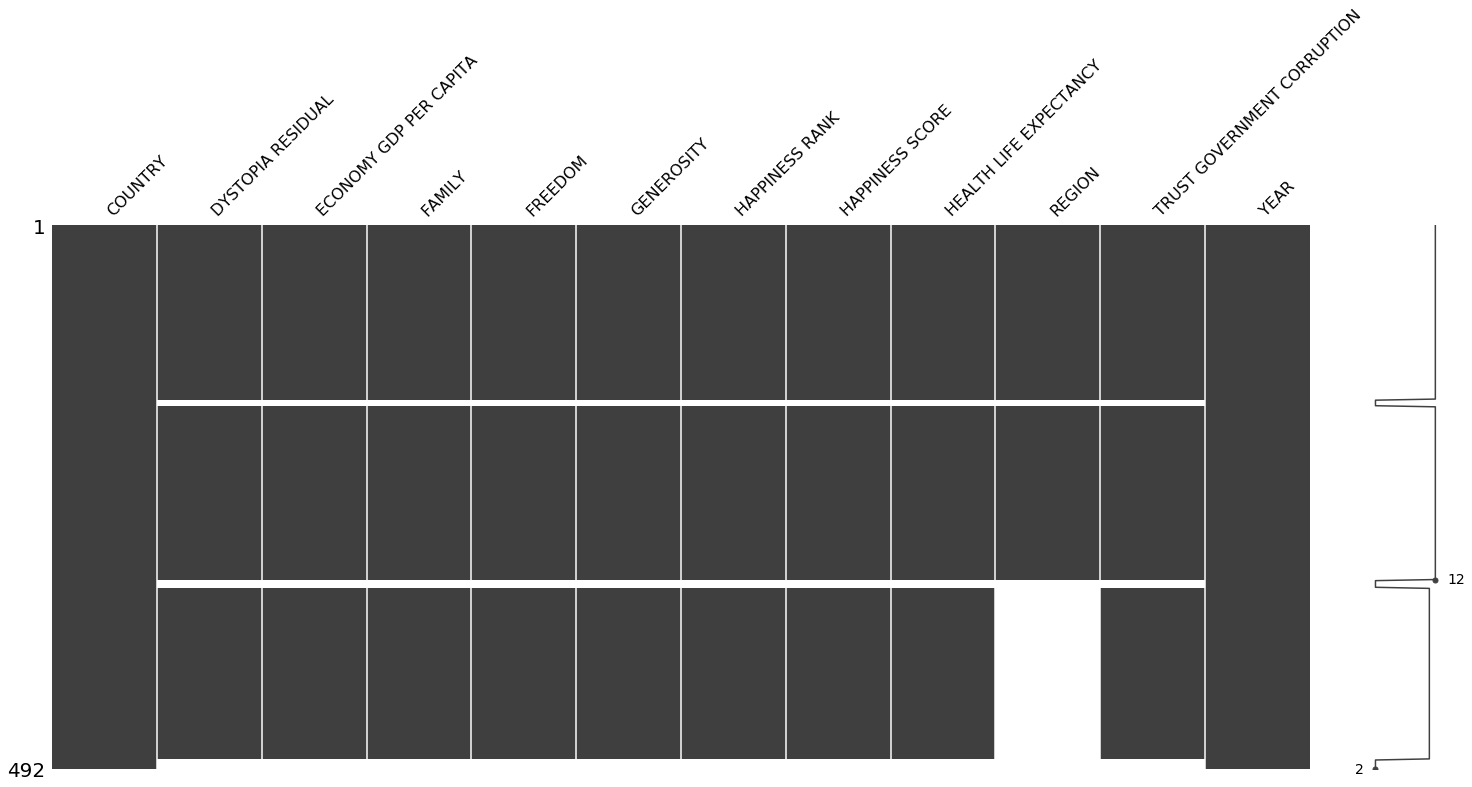

In [109]:
msno.matrix(combined_droped)
plt.show()

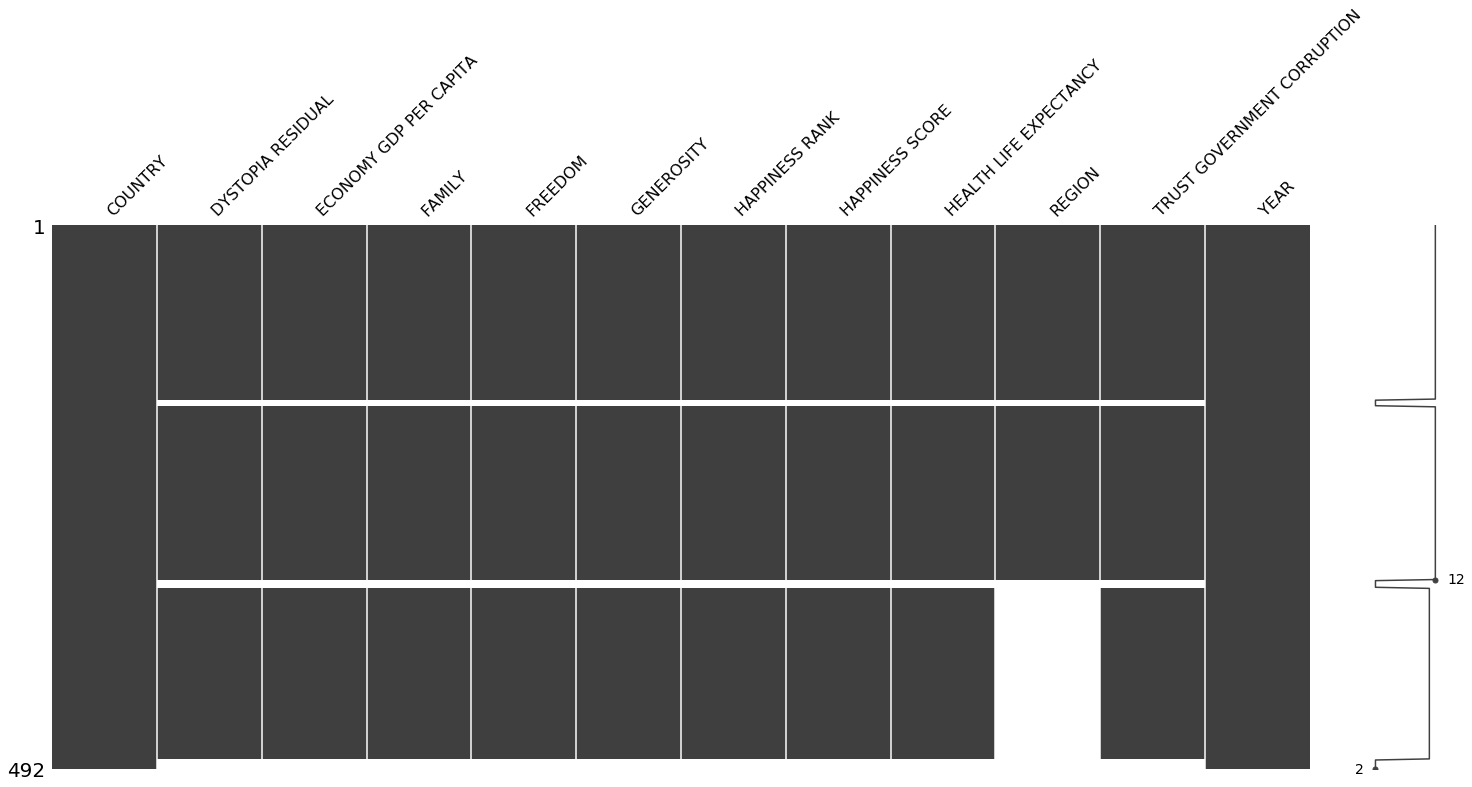

In [110]:
msno.matrix(combined_droped)
plt.show()

#### Using Data From Additional Sources to Fill in Missing Values

In [ ]:
# dopolnjevanje podatkov

In [112]:
region_nan = combined_droped['REGION'].isnull()

In [113]:
combined_droped[region_nan]['YEAR'].value_counts()

2017    164
2016      7
2015      6
Name: YEAR, dtype: int64

In [116]:
combined_droped.loc[combined_droped['YEAR']==2017, :].head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,REGION,TRUST GOVERNMENT CORRUPTION,YEAR
328,Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,NaN,0.315964,2017
329,Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,NaN,0.400770,2017
330,Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,NaN,0.153527,2017
331,Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,NaN,0.367007,2017
332,Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,NaN,0.382612,2017


In [117]:
regions2015 = happiness2015[['COUNTRY', 'REGION']].copy()
regions2016 = happiness2016[['COUNTRY', 'REGION']].copy()

In [118]:
regions = pd.concat([regions2015, regions2016], ignore_index=True)

In [119]:
regions.head()

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [120]:
regions.dropna(inplace=True)

In [121]:
regions.drop_duplicates(inplace=True)

In [122]:
regions.head(10)

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
5,Finland,Western Europe
6,Netherlands,Western Europe
7,Sweden,Western Europe
8,New Zealand,Australia and New Zealand
9,Australia,Australia and New Zealand


In [127]:
combined_droped = pd.merge(left=combined_droped,
                         right=regions,
                         on='COUNTRY',
                         how='left')

In [129]:
combined_droped.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
REGION_x                       177
TRUST GOVERNMENT CORRUPTION     22
YEAR                             0
REGION_y                         0
dtype: int64

In [130]:
combined_droped = combined_droped.drop('REGION_x', axis=1) 

In [131]:
combined_droped.rename(columns = {'REGION_y':'REGION'}, inplace=True)

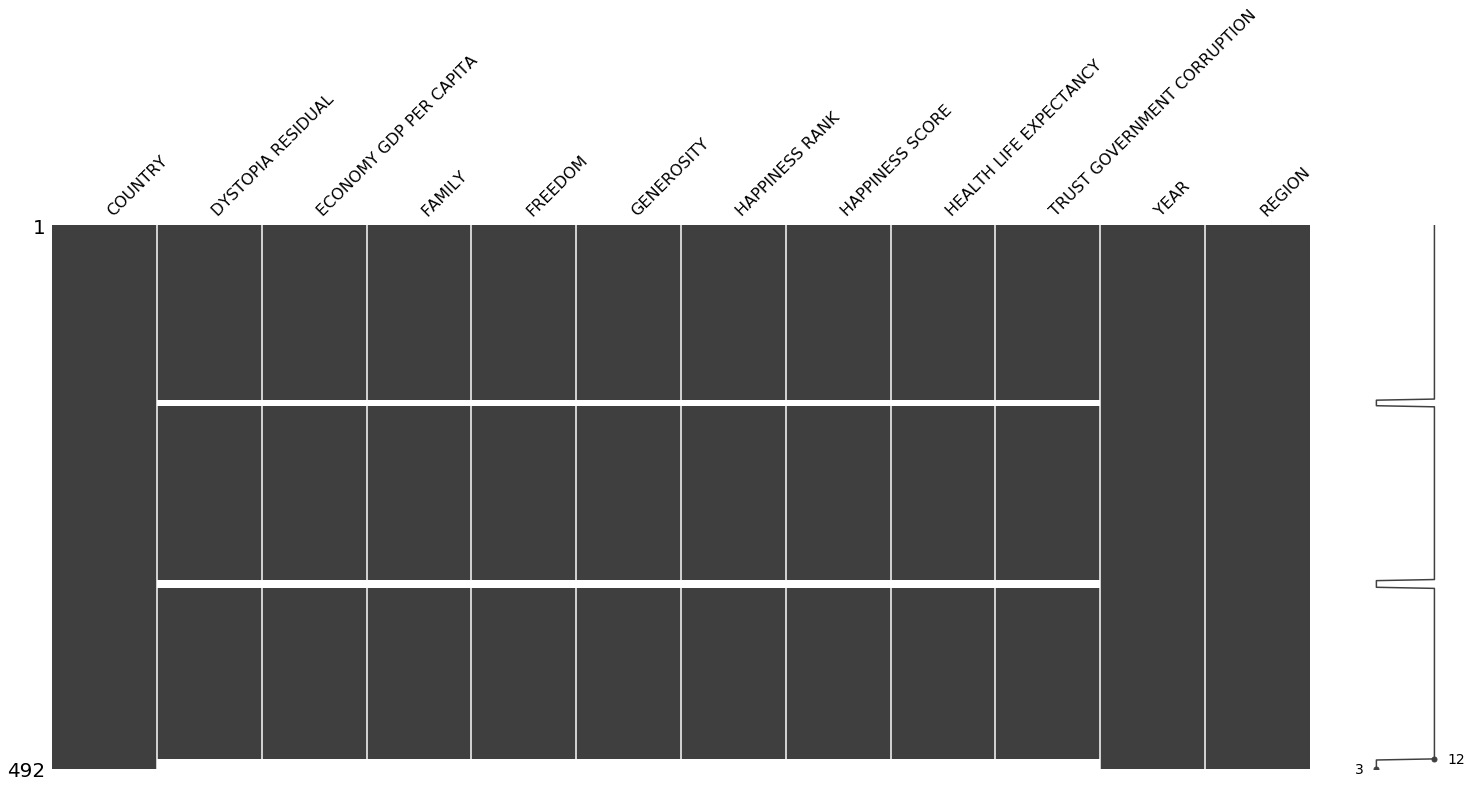

In [132]:
msno.matrix(combined_droped)
plt.show()

#### Removing all missing values from World Happiness Reports datasets

In [133]:
dups = combined_droped.duplicated(['COUNTRY', 'YEAR'])

In [134]:
combined_droped[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,TRUST GOVERNMENT CORRUPTION,YEAR,REGION


In [136]:
combined_droped['COUNTRY'] = combined_droped['COUNTRY'].str.upper()

In [137]:
combined_droped[combined_droped['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,TRUST GOVERNMENT CORRUPTION,YEAR,REGION
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,0.39928,2015,Sub-Saharan Africa
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97,5.057,0.33108,0.36794,2016,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


In [138]:
combined_droped[combined_droped['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,TRUST GOVERNMENT CORRUPTION,YEAR,REGION
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,0.39928,2015,Sub-Saharan Africa
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97,5.057,0.33108,0.36794,2016,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


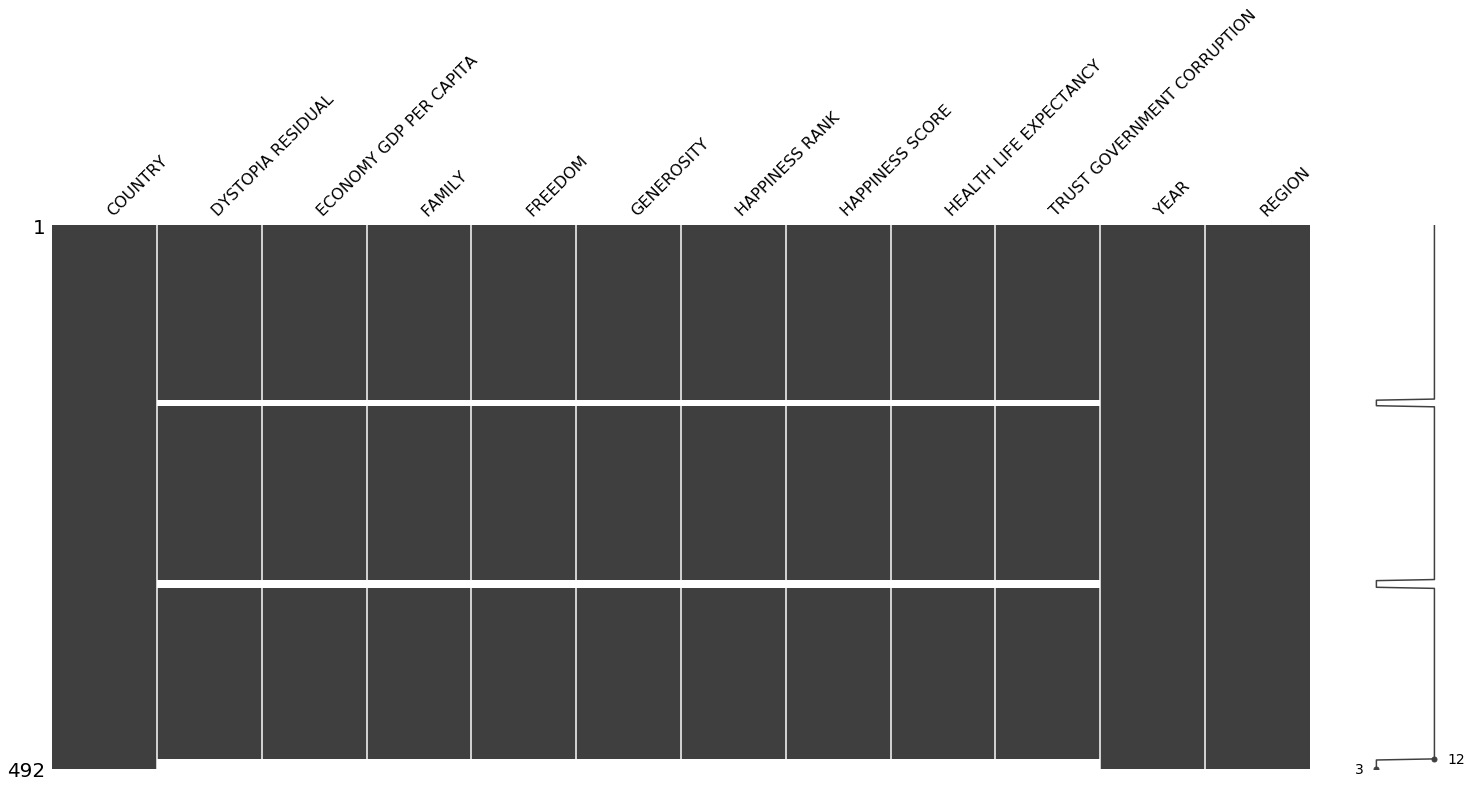

In [139]:
msno.matrix(combined_droped)
plt.show()

In [140]:
combined_droped.isnull().sum()

COUNTRY                         0
DYSTOPIA RESIDUAL              22
ECONOMY GDP PER CAPITA         22
FAMILY                         22
FREEDOM                        22
GENEROSITY                     22
HAPPINESS RANK                 22
HAPPINESS SCORE                22
HEALTH LIFE EXPECTANCY         22
TRUST GOVERNMENT CORRUPTION    22
YEAR                            0
REGION                          0
dtype: int64

In [141]:
com_sorted = combined_droped.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])

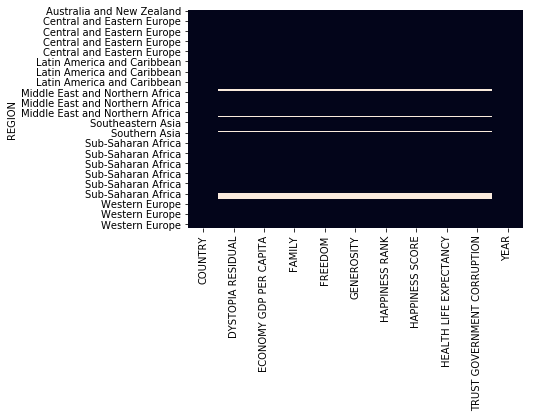

In [142]:
sns.heatmap(com_sorted.isnull(), cbar=False)
plt.show()

In [143]:
combined_droped.isnull().sum()

COUNTRY                         0
DYSTOPIA RESIDUAL              22
ECONOMY GDP PER CAPITA         22
FAMILY                         22
FREEDOM                        22
GENEROSITY                     22
HAPPINESS RANK                 22
HAPPINESS SCORE                22
HEALTH LIFE EXPECTANCY         22
TRUST GOVERNMENT CORRUPTION    22
YEAR                            0
REGION                          0
dtype: int64

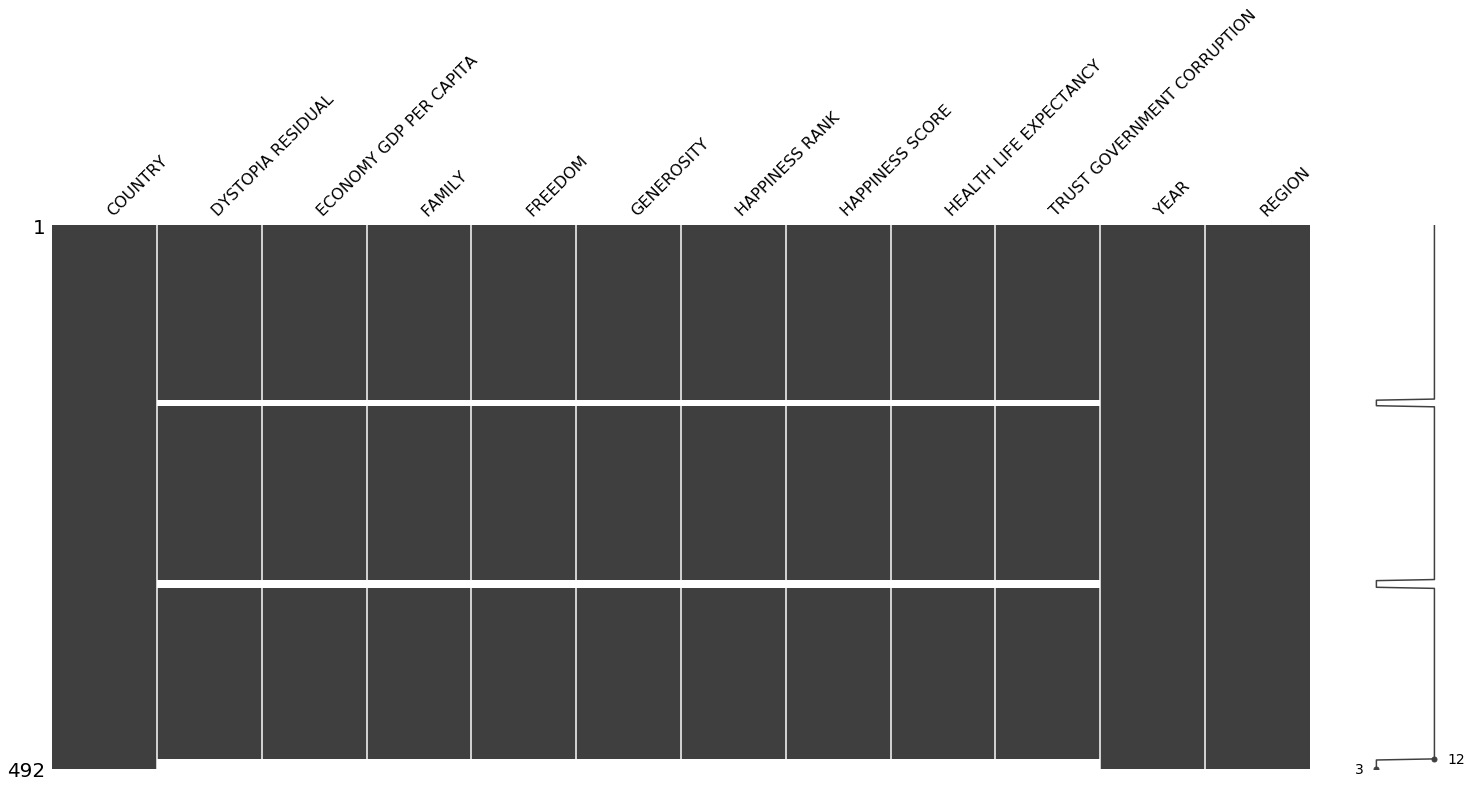

In [144]:
msno.matrix(combined_droped)
plt.show()

In [145]:
combined_droped.pivot_tables(index='REGION',
                            values='HAPPINESS SCORE',
                            margins=True)

AttributeError: 'DataFrame' object has no attribute 'pivot_tables'

### Missing time-series data

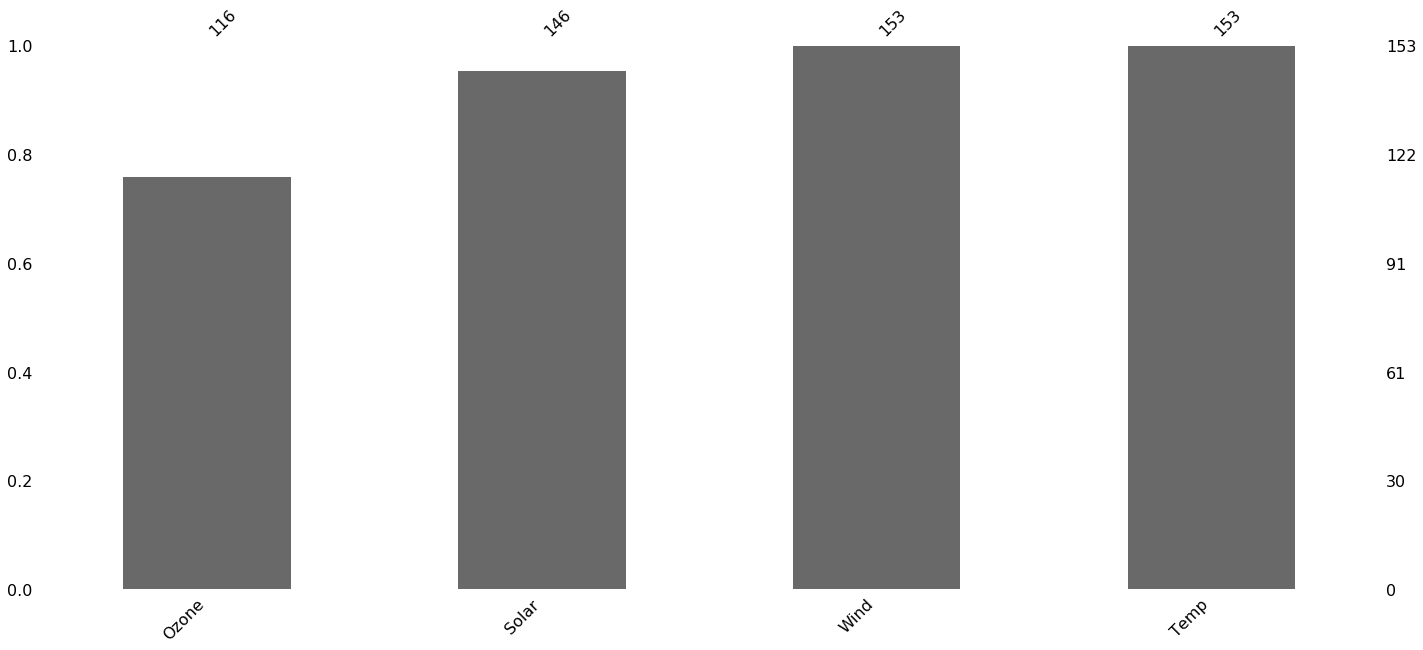

In [146]:
# Plot amount of missingness
msno.bar(airquality)

# Display bar chart of missing values
plt.show()

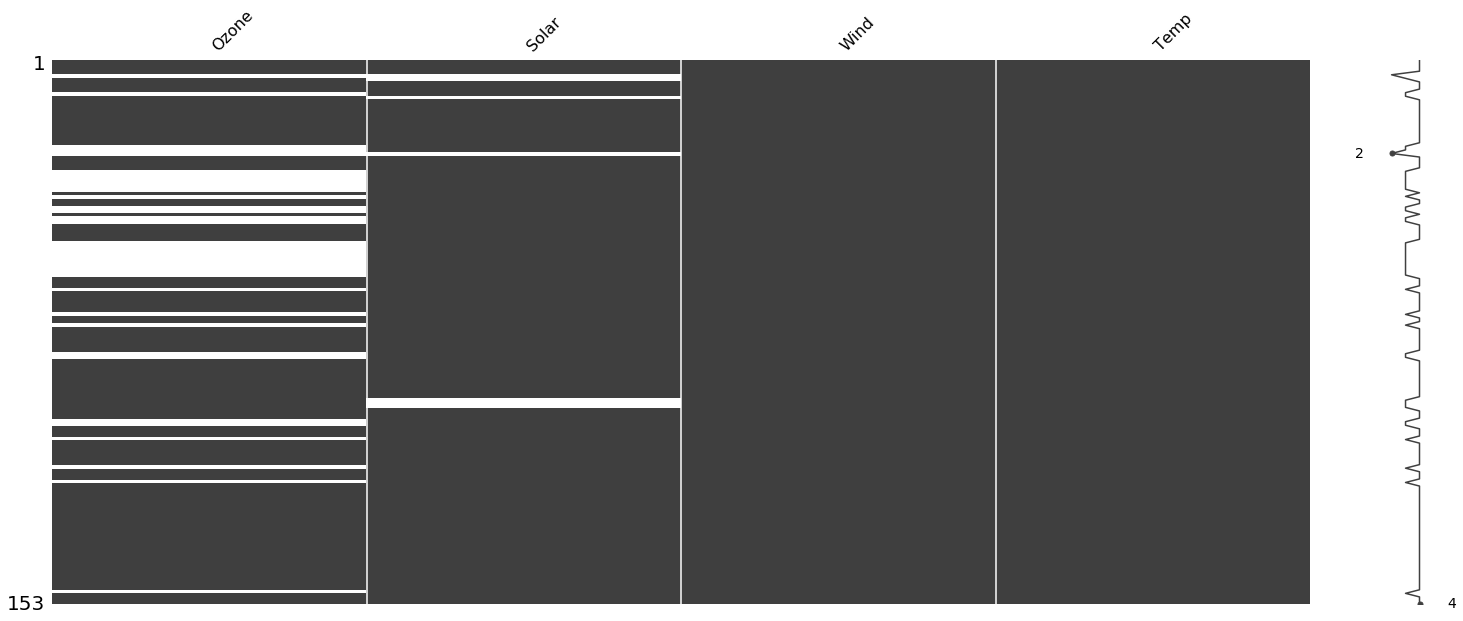

In [147]:
# Plot nullity matrix of airquality
msno.matrix(airquality)

# Display nullity matrix
plt.show()

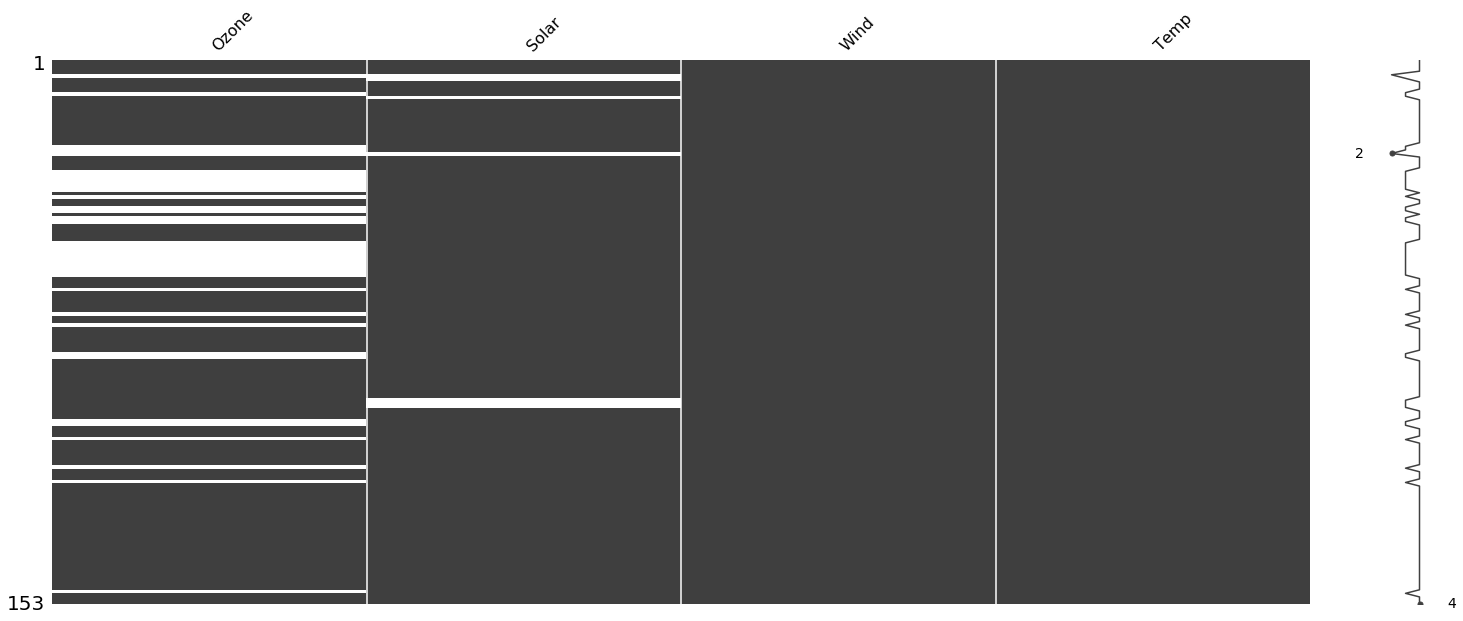

In [148]:
# Plot nullity matrix of airquality with frequency 'M'
msno.matrix(airquality, )

# Display nullity matrix
plt.show()

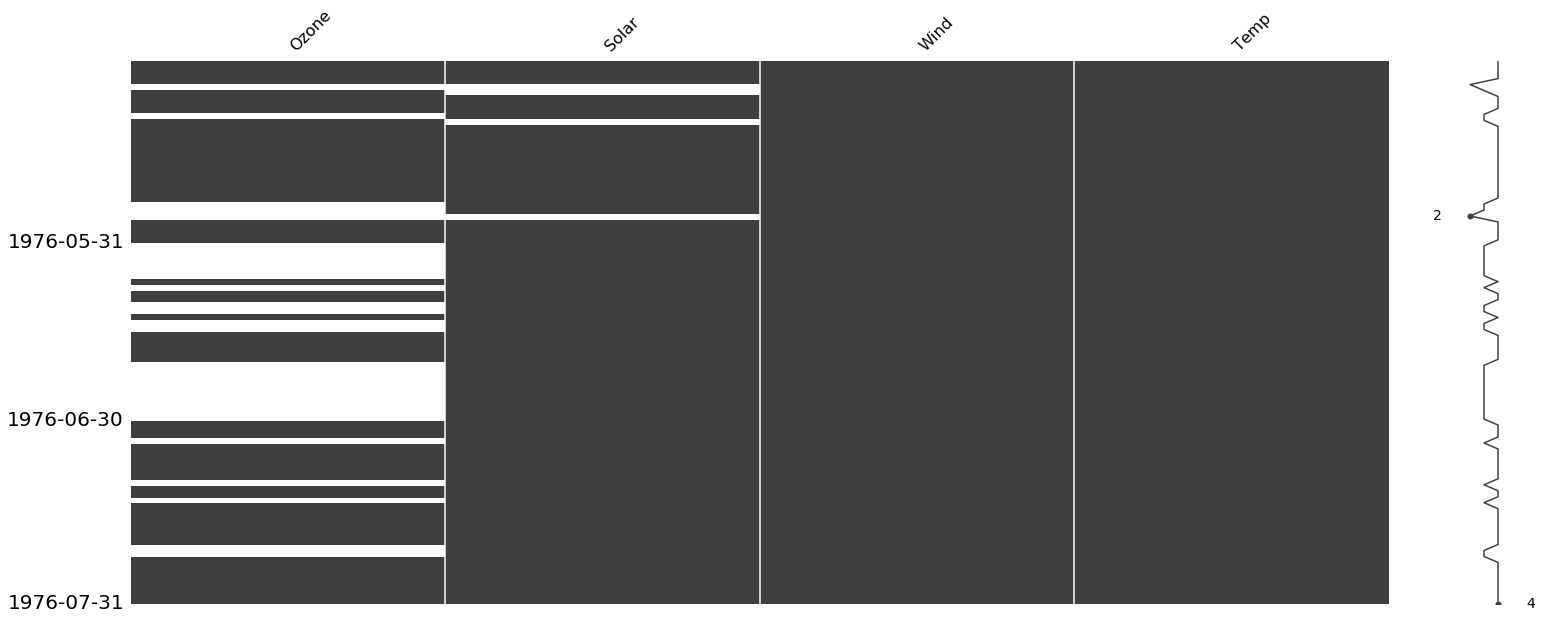

In [149]:
# Plot the sliced nullity matrix of airquality with frequency 'M'
msno.matrix(airquality.loc['May-1976':'Jul-1976'], freq='M')
plt.show()

#### Impute with Forward-fill & Backfill 


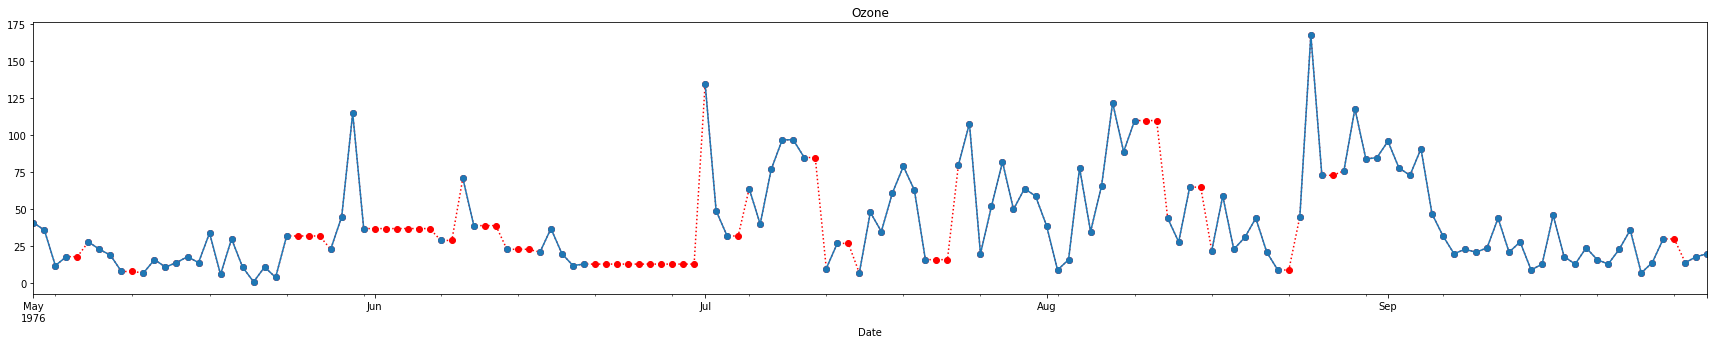

In [154]:
# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.fillna(method='ffill')


# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

In [151]:
# Print prior to imputing missing values
airquality[30:40]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.0,279.0,7.4,76
1976-06-01,NaN,286.0,8.6,78
1976-06-02,NaN,287.0,9.7,74
1976-06-03,NaN,242.0,16.1,67
1976-06-04,NaN,186.0,9.2,84
1976-06-05,NaN,220.0,8.6,85
1976-06-06,NaN,264.0,14.3,79
1976-06-07,29.0,127.0,9.7,82
1976-06-08,NaN,273.0,6.9,87


In [ ]:
# Fill NaNs using backward fill


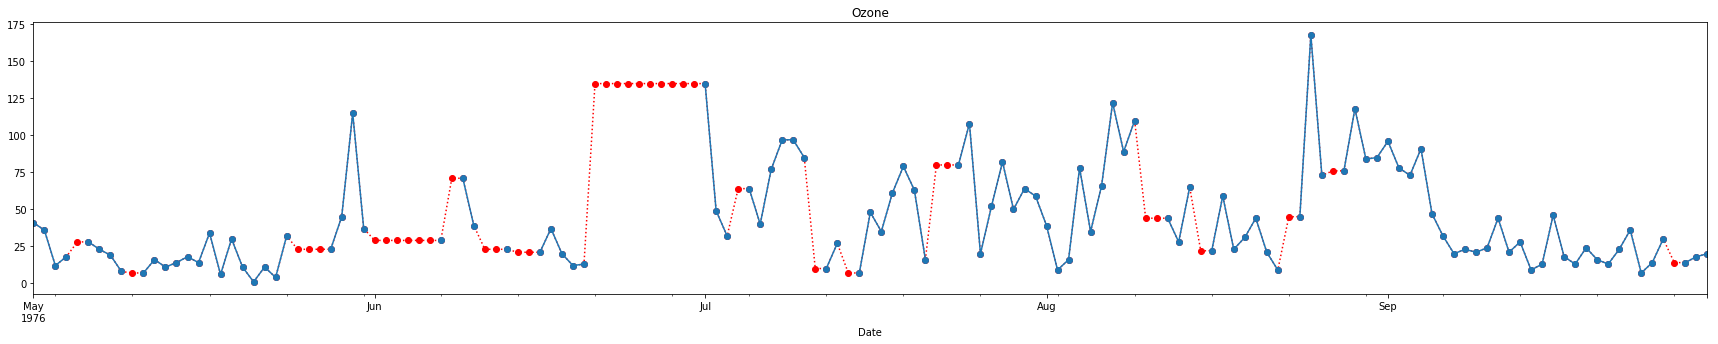

In [153]:
# Impute airquality DataFrame with bfill method
bfill_imputed = airquality.fillna(method='bfill')

# Plot the imputed DataFrame bfill_imp in red dotted style 
bfill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

#### Impute with interpolate method

In [155]:
# Interpolate the NaNs linearly


In [156]:
# Interpolate the NaNs quadratically
airquality.interpolate(method='quadratic', inplace=False)[30:40]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.000000,279.0,7.4,76
1976-06-01,-38.361123,286.0,8.6,78
1976-06-02,-79.352735,287.0,9.7,74
1976-06-03,-85.974836,242.0,16.1,67
1976-06-04,-62.354606,186.0,9.2,84
1976-06-05,-33.255133,220.0,8.6,85
1976-06-06,-2.803598,264.0,14.3,79
1976-06-07,29.000000,127.0,9.7,82
1976-06-08,62.155660,273.0,6.9,87


In [157]:
# Interpolate the NaNs with nearest value
airquality.interpolate(method='nearest', inplace=False)[30:40]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.0,279.0,7.4,76
1976-06-01,37.0,286.0,8.6,78
1976-06-02,37.0,287.0,9.7,74
1976-06-03,37.0,242.0,16.1,67
1976-06-04,29.0,186.0,9.2,84
1976-06-05,29.0,220.0,8.6,85
1976-06-06,29.0,264.0,14.3,79
1976-06-07,29.0,127.0,9.7,82
1976-06-08,29.0,273.0,6.9,87


In [158]:
linear = airquality.interpolate(method='linear')
quadratic = airquality.interpolate(method='quadratic')
nearest = airquality.interpolate(method='nearest')

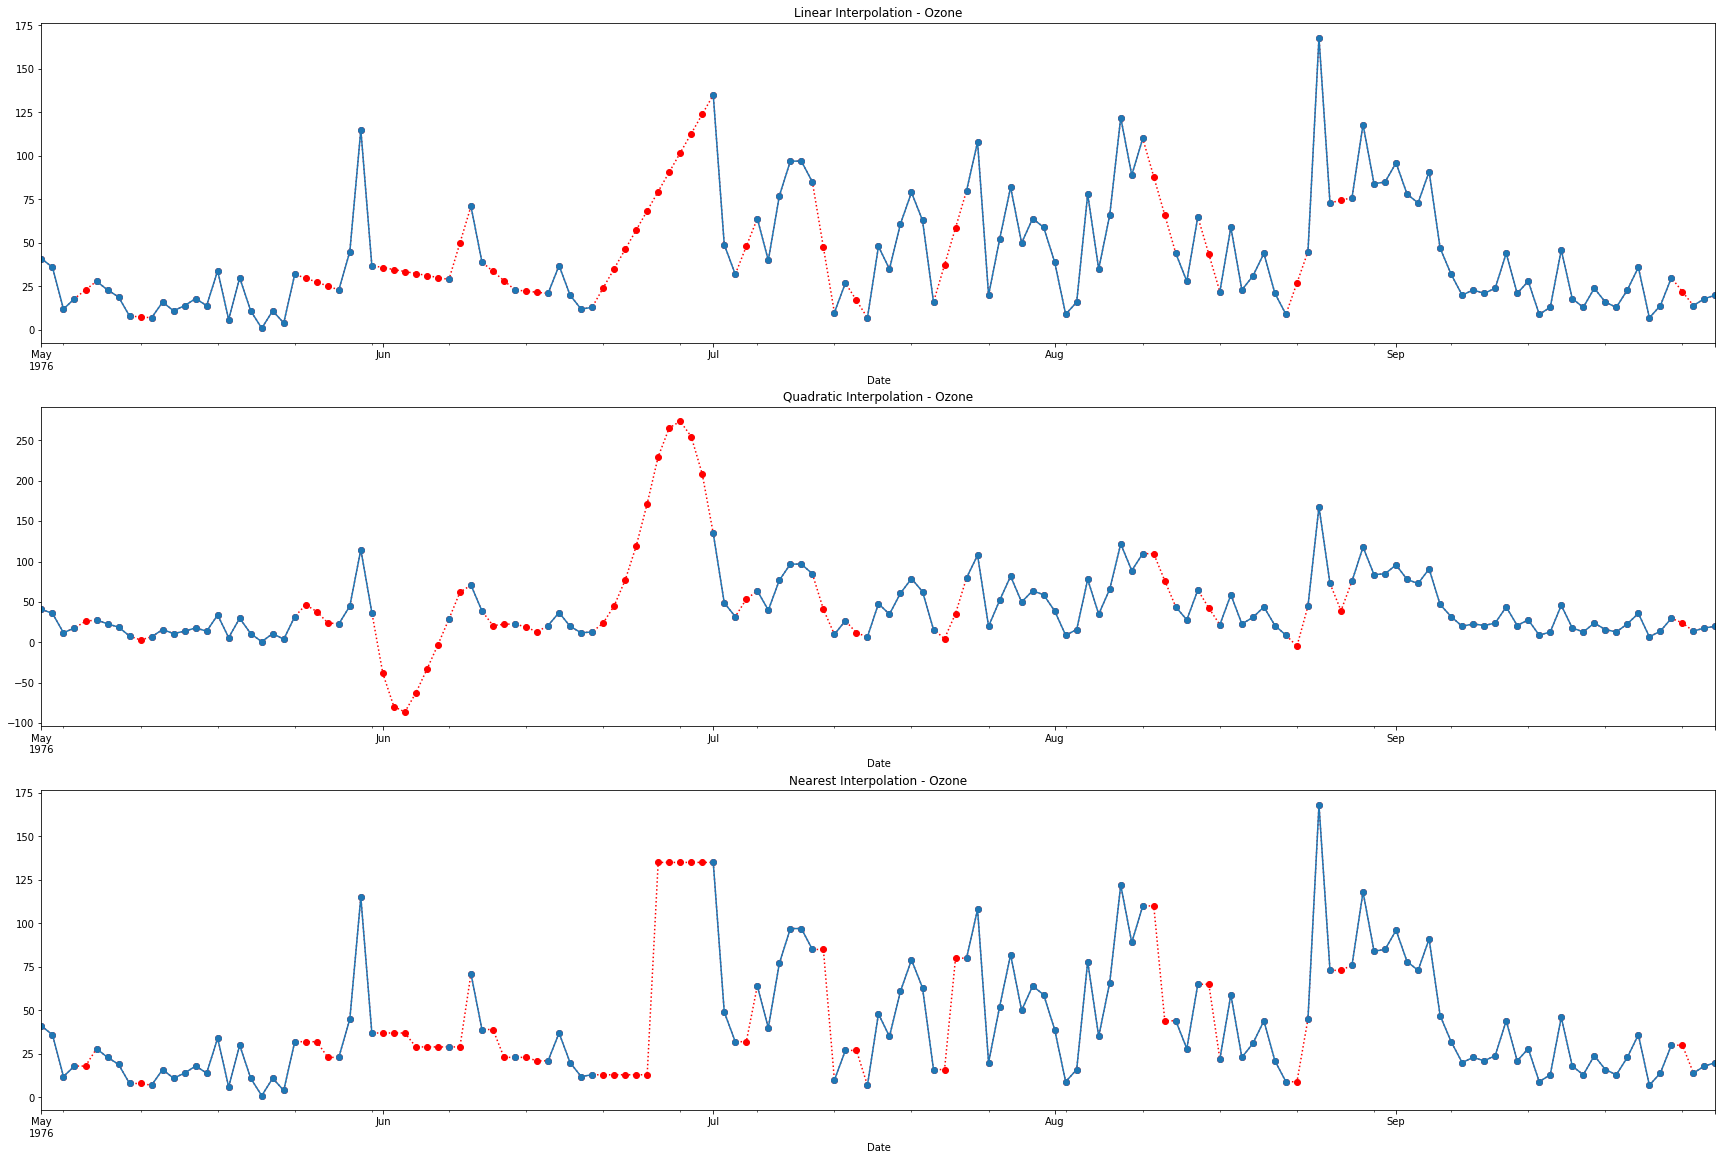

In [159]:
# Set nrows to 3 and ncols to 1
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

# Create a dictionary of interpolations
interpolations = {'Linear Interpolation': linear, 
                  'Quadratic Interpolation': quadratic, 
                  'Nearest Interpolation': nearest}

# Loop over axes and interpolations
for ax, df_key in zip(axes, interpolations):
    # Select and also set the title for a DataFrame
    interpolations[df_key].Ozone.plot(color='red', 
                                      marker='o', 
                                      linestyle='dotted', ax=ax)
    
    airquality.Ozone.plot(title=df_key + ' - Ozone', marker='o', ax=ax)

plt.show()